In [43]:
#Importing Libraries

In [117]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [118]:
#Extract Filenames from Folder
import os

if os.path.exists('images'):
    filenames = [os.path.join('images', file) for file in os.listdir('images')]
else:
    print("The 'images' folder doesn't exist.")


In [119]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [120]:
len(filenames)

44441

In [121]:
#Importing ResNet50 Model and Cofiguration

In [122]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [123]:
#Extracting Fetaures from Image

In [124]:
file_path = r'c:\Users\windows 10\Desktop\project\images\1582.jpg'

In [125]:
img = image.load_img(file_path, target_size=(224, 224))

In [126]:
img = image.load_img('images/16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 1s 1s/step


array([0.        , 0.00295299, 0.        , ..., 0.00752506, 0.02113522,
       0.00401739], dtype=float32)

In [127]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [128]:
extract_features_from_images(filenames[0], model)

1/1 [==============================] - 0s 158ms/step


array([0.        , 0.01761621, 0.00171601, ..., 0.01247231, 0.02726381,
       0.06899235], dtype=float32)

In [129]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 [==============================] - 0s 160ms/step


[array([0.        , 0.01761621, 0.00171601, ..., 0.01247231, 0.02726381,
        0.06899235], dtype=float32),
 array([0.        , 0.03648946, 0.        , ..., 0.00997931, 0.02375534,
        0.04649899], dtype=float32),
 array([0.        , 0.03642134, 0.00710437, ..., 0.00140778, 0.        ,
        0.05435042], dtype=float32),
 array([0.00232167, 0.05030552, 0.00747745, ..., 0.00346684, 0.03391021,
        0.04565712], dtype=float32),
 array([0.00306836, 0.06240451, 0.        , ..., 0.00170625, 0.0203289 ,
        0.05833266], dtype=float32)]

In [130]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [131]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [132]:
#Loading Pickle Files

In [133]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [134]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [135]:
np.array(Image_features).shape

(5, 2048)

In [136]:
#Finidng Simialar Images

In [137]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [138]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [139]:
input_image = extract_features_from_images('images/16871.jpg',model)

1/1 [==============================] - 0s 156ms/step


In [140]:
distance, indices = neighbors.kneighbors([input_image], n_neighbors=4)


In [141]:
indices[0]

array([1, 3, 2, 0], dtype=int64)

In [142]:
from IPython.display import Image

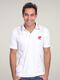

In [143]:
Image('images/1756.jpg')

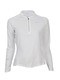

In [144]:
Image(filenames[indices[0][1]])

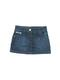

In [145]:
Image(filenames[indices[0][2]])

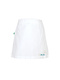

In [146]:
Image(filenames[indices[0][3]])

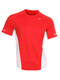

In [151]:
Image('images/2279.jpg')

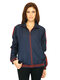

In [153]:
Image('images/1610.jpg')